In [1]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

!mkdir $folder

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages_changing_events', flotilla_dir=flotilla_dir)

mkdir: missing operand
Try `mkdir --help' for more information.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-12 11:52:07	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages_changing_events/datapackage.json
2016-01-12 11:52:07	Parsing datapackage to create a Study object
2016-01-12 11:52:38	Initializing Study
2016-01-12 11:52:38	Initializing Predictor configuration manager for Study
2016-01-12 11:52:38	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-12 11:52:38	Added ExtraTreesClassifier to default predictors
2016-01-12 11:52:38	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-12 11:52:38	Added ExtraTreesRegressor to default predictors
2016-01-12 11:52:38	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-12 11:52:38	Added GradientBoostingClassifier to default predictors
2016-01-12 11:52:38	Predictor GradientBoostingRegressor is of type <class 'skle

In [2]:
changing_events_cols = 'Changing Events', 'Strict Changing Events'

FIGURE_FOLDER = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/gene_ontology'


def folderize(col):
    """Replace spaces with underscores, add to changing events folder for a new folder"""
    new_folder = '{}/{}'.format(FIGURE_FOLDER, col.replace(' ', '_').lower())
    ! mkdir -p $new_folder
    return new_folder

for col in changing_events_cols:
    new_folder = folderize(col)
    print new_folder
#     ! mkdir $new_folder

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/gene_ontology/changing_events
/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/gene_ontology/strict_changing_events


## Features of changing events

### Assign feature data

### Boolean features

In [3]:
voyages = study.supplemental.voyages.loc[study.supplemental.voyages.transition == 'iPSC-MN']
print voyages.shape
feature_data = study.splicing.feature_data.merge(voyages, left_index=True, right_on=['event_id'])
print(feature_data.shape)
feature_data.head()

(2371, 10)
(2371, 119)


,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
1,only one,NaN,only one,ENSG00000099194,exon:chr10:102114184-102114389:+,206,exon:chr10:102116289-102116521:+,233,exon:chr10:102120491-102124591:+,4101,...,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
4,best,appris_principal,"best,appris_principal","ENSG00000255339,ENSG00000075826,ENSG00000166136",exon:chr10:102286732-102286831:-,100,exon:chr10:102286156-102286311:-,156,exon:chr10:102283497-102283686:-,190,...,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
8,only one,NaN,only one,ENSG00000166171,exon:chr10:103348089-103348157:+,69,exon:chr10:103354415-103354495:+,81,exon:chr10:103360495-103360619:+,125,...,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
11,only one,NaN,only one,ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103364897-103364969:+,73,exon:chr10:103368592-103368694:+,103,...,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.019318,0.050000,0.053602,iPSC,MN,$\nwarrow$,iPSC-MN,~0,bimodal
15,best,appris_principal,"best,appris_principal",ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103368592-103368694:+,103,exon:chr10:103369124-103369425:+,302,...,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.042045,-0.050000,0.065328,iPSC,MN,$\searrow$,iPSC-MN,~1,bimodal


In [6]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

In [11]:
study.splicing.feature_expression_id_col = 'ensembl_id'

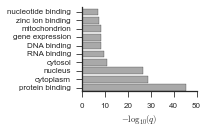

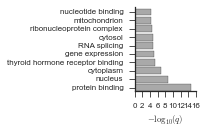

In [21]:
for changing_events_col in changing_events_cols:
    col = study.splicing.feature_data[changing_events_col].dropna()

    foreground_events = col.index[col == 'Foreground']
    background_events = col.index

    foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
    background_genes = study.splicing.splicing_to_expression_id(background_events)
    
    go_enrichment = study.go_enrichment(foreground_genes, background_genes, min_background_size=10, min_feature_size=5)
    
    fig, ax = plt.subplots(figsize=(3, 2))
    plot_go_enrichment(data=go_enrichment, color='darkgrey')
    fig.tight_layout()
    fig.savefig('{}/all_foreground_go.pdf'.format(folderize(changing_events_col)))

In [15]:
go_enrichment.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0005515,"ENSG00000116586,ENSG00000113712,ENSG0000017393...","LAMTOR2,CSNK1A1,RBM4,XRN2,STAU2,GDAP1,PDZD11,T...",molecular_function,protein binding,1676,86,9884,3.693874e-17,5.171424e-15
GO:0005634,"ENSG00000178982,ENSG00000160310,ENSG0000013829...","EIF3K,PRMT2,NCOA4,THOC7,RAB1A,RBM4,XRN2,CLK1,R...",cellular_component,nucleus,1182,60,5678,2.938859e-11,4.114402e-09
GO:0005737,"ENSG00000138069,ENSG00000160310,ENSG0000016363...","RAB1A,PRMT2,THOC7,RBM4,CLK1,DGUOK,RPS24,PCBP2,...",cellular_component,cytoplasm,1081,53,5053,2.163846e-09,3.029385e-07
GO:0046966,"ENSG00000137947,ENSG00000108278,ENSG0000014102...","GTF2B,ZNHIT3,NCOR1,THRAP3,PRMT2",molecular_function,thyroid hormone receptor binding,12,5,28,8.639862e-08,1.209581e-05
GO:0010467,"ENSG00000178982,ENSG00000115875,ENSG0000013832...","EIF3K,SRSF7,RPS24,PCBP2,PSMB3,DDX6,RBM5,UPF3B,...",biological_process,gene expression,347,24,771,1.381980e-07,1.934772e-05


Changing Events
Strict Changing Events


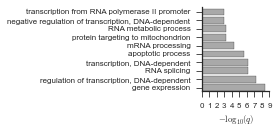

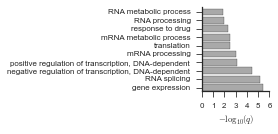

In [20]:
for changing_events_col in changing_events_cols:
    print changing_events_col
    col = study.splicing.feature_data[changing_events_col].dropna()

    foreground_events = col.index[col == 'Foreground']
    background_events = col.index

    foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
    background_genes = study.splicing.splicing_to_expression_id(background_events)
    
    go_enrichment = study.go_enrichment(foreground_genes, background_genes, domain='biological_process', 
                                        min_background_size=10, min_feature_size=5)
    
    fig, ax = plt.subplots(figsize=(4, 2))
    plot_go_enrichment(data=go_enrichment, color='darkgrey')
    fig.tight_layout()
    fig.savefig('{}/all_foreground_go_biological_process.pdf'.format(folderize(changing_events_col)))

In [35]:
folderize(changing_events_col)

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/gene_ontology/strict_changing_events'

In [45]:
bimodal = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.modality == 'bimodal']
bimodal_ipsc_only = bimodal.groupby('phenotype').filter(lambda x: bool((len(x) == 1) & x.phenotype.isin(['iPSC']).sum()))
bimodal_ipsc_only

,event_name,phenotype,modality,n_cells


In [48]:
bimodal_names = bimodal.join(study.splicing.feature_data.gene_name, on='event_name')
bimodal_names.loc[bimodal_names.gene_name == 'ZNF195']

,event_name,phenotype,modality,n_cells,gene_name
965,exon:chr11:3392205-3392300:-@exon:chr11:338297...,NPC,bimodal,28,ZNF195
972,exon:chr11:3400268-3400330:-@exon:chr11:339480...,NPC,bimodal,28,ZNF195
973,exon:chr11:3400268-3400330:-@exon:chr11:339480...,iPSC,bimodal,46,ZNF195
976,exon:chr11:3400268-3400330:-@exon:chr11:339884...,iPSC,bimodal,24,ZNF195


In [49]:
bimodal_names.loc[bimodal_names.gene_name == 'ZNF195'].values

array([[ 'exon:chr11:3392205-3392300:-@exon:chr11:3382973-3383119:-@exon:chr11:3379996-3381795:-',
        'NPC', 'bimodal', 28, 'ZNF195'],
       [ 'exon:chr11:3400268-3400330:-@exon:chr11:3394807-3394886:-@exon:chr11:3392807-3392933:-',
        'NPC', 'bimodal', 28, 'ZNF195'],
       [ 'exon:chr11:3400268-3400330:-@exon:chr11:3394807-3394886:-@exon:chr11:3392807-3392933:-',
        'iPSC', 'bimodal', 46, 'ZNF195'],
       [ 'exon:chr11:3400268-3400330:-@exon:chr11:3398847-3399130:-@exon:chr11:3394807-3394886:-',
        'iPSC', 'bimodal', 24, 'ZNF195']], dtype=object)

NameError: name 'figure_folder' is not defined

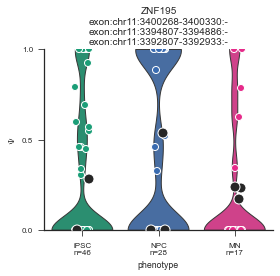

In [54]:
study.plot_event('exon:chr11:3400268-3400330:-@exon:chr11:3394807-3394886:-@exon:chr11:3392807-3392933:-', 
                 sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/znf195_splicing.pdf'.format(figure_folder))

In [36]:
ls /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/gene_ontology/strict_changing_events

all_foreground_go.pdf
all_foreground_go_biological_process.pdf
foreground_go_nearrow.pdf
foreground_go_nwarrow.pdf
foreground_go_nwarrow_biological_process.pdf
foreground_go_searrow.pdf
foreground_go_searrow_biological_process.pdf


In [22]:
feature_data

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition,group1_modality,group2_modality
1,only one,NaN,only one,ENSG00000099194,exon:chr10:102114184-102114389:+,206,exon:chr10:102116289-102116521:+,233,exon:chr10:102120491-102124591:+,4101,...,exon:chr10:102114184-102114389:+@exon:chr10:10...,0.000000,0.035088,0.035088,iPSC,MN,$\nwarrow$,iPSC-MN,~1,~1
4,best,appris_principal,"best,appris_principal","ENSG00000255339,ENSG00000075826,ENSG00000166136",exon:chr10:102286732-102286831:-,100,exon:chr10:102286156-102286311:-,156,exon:chr10:102283497-102283686:-,190,...,exon:chr10:102286732-102286831:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
8,only one,NaN,only one,ENSG00000166171,exon:chr10:103348089-103348157:+,69,exon:chr10:103354415-103354495:+,81,exon:chr10:103360495-103360619:+,125,...,exon:chr10:103348089-103348157:+@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
11,only one,NaN,only one,ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103364897-103364969:+,73,exon:chr10:103368592-103368694:+,103,...,exon:chr10:103360960-103361093:+@exon:chr10:10...,-0.019318,0.050000,0.053602,iPSC,MN,$\nwarrow$,iPSC-MN,~0,bimodal
15,best,appris_principal,"best,appris_principal",ENSG00000166171,exon:chr10:103360960-103361093:+,134,exon:chr10:103368592-103368694:+,103,exon:chr10:103369124-103369425:+,302,...,exon:chr10:103360960-103361093:+@exon:chr10:10...,0.042045,-0.050000,0.065328,iPSC,MN,$\searrow$,iPSC-MN,~1,bimodal
19,only one,NaN,only one,ENSG00000198408,exon:chr10:103563492-103563776:-,285,exon:chr10:103559999-103560157:-,159,exon:chr10:103558599-103559212:-,614,...,exon:chr10:103563492-103563776:-@exon:chr10:10...,0.036561,-0.043478,0.056807,iPSC,MN,$\searrow$,iPSC-MN,~1,bimodal
22,best,appris_principal,"best,appris_principal",ENSG00000198408,exon:chr10:103567487-103567658:-,172,exon:chr10:103565802-103565900:-,99,exon:chr10:103563492-103563776:-,285,...,exon:chr10:103567487-103567658:-@exon:chr10:10...,-0.040043,0.047619,0.062217,iPSC,MN,$\nwarrow$,iPSC-MN,bimodal,~1
27,only one,NaN,only one,ENSG00000107874,exon:chr10:104192283-104192325:-,43,exon:chr10:104184872-104184955:-,84,exon:chr10:104184406-104184549:-,144,...,exon:chr10:104192283-104192325:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1
9237,one event with gencode transcripts,NaN,one event with gencode transcripts,ENSG00000269609,exon:chr10:104209950-104210087:+,138,exon:chr10:104211156-104211312:+,157,exon:chr10:104215094-104215184:+,91,...,exon:chr10:104209950-104210087:+@exon:chr10:10...,0.055236,0.110784,0.123791,iPSC,MN,$\nearrow$,iPSC-MN,~0,bimodal
30,only one,NaN,only one,ENSG00000138107,exon:chr10:104241758-104241932:-,175,exon:chr10:104241594-104241655:-,62,exon:chr10:104240889-104240929:-,41,...,exon:chr10:104241758-104241932:-@exon:chr10:10...,0.000000,0.000000,0.000000,iPSC,MN,NaN,iPSC-MN,~1,~1


In [23]:
from astrolabe.utils import remove_latex_chars_from_arrow

(149, 119)
(545, 119)
(509, 119)
(264, 119)
(149, 119)
(545, 119)
(509, 119)
(264, 119)


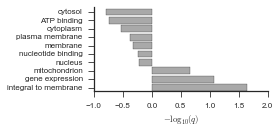

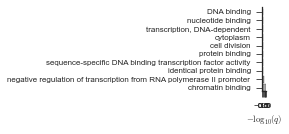

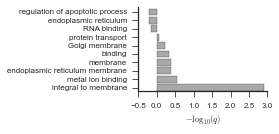

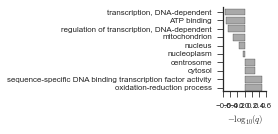

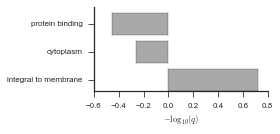

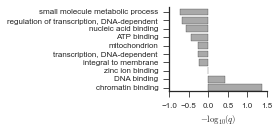

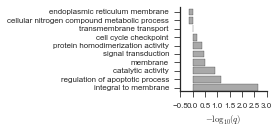

In [31]:
for changing_events_col in changing_events_cols:
    for arrow, df in feature_data.groupby('direction'):
        print df.shape
        col = df[changing_events_col].dropna()

        foreground_events = col.index[col == 'Foreground']
        background_events = col.index

        foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
        background_genes = study.splicing.splicing_to_expression_id(background_events)

        go_enrichment = study.go_enrichment(foreground_genes, background_genes, min_background_size=10, min_feature_size=5)
        if go_enrichment is None:
            continue
            
        fig, ax = plt.subplots(figsize=(4, 2))
        plot_go_enrichment(data=go_enrichment, color='darkgrey')
        fig.tight_layout()
        fig.savefig('{}/foreground_go_{}.pdf'.format(folderize(changing_events_col), remove_latex_chars_from_arrow(arrow)))

(149, 119)
(545, 119)
(509, 119)
(264, 119)
(149, 119)
(545, 119)
(509, 119)
(264, 119)


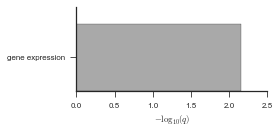

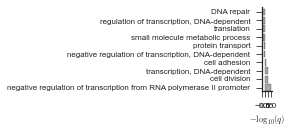

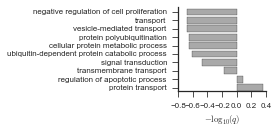

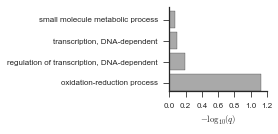

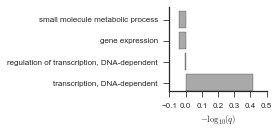

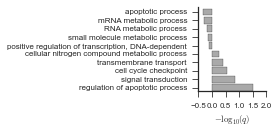

In [33]:
for changing_events_col in changing_events_cols:
    for arrow, df in feature_data.groupby('direction'):
        print df.shape
        col = df[changing_events_col].dropna()

        foreground_events = col.index[col == 'Foreground']
        background_events = col.index

        foreground_genes = study.splicing.splicing_to_expression_id(foreground_events)
        background_genes = study.splicing.splicing_to_expression_id(background_events)

        go_enrichment = study.go_enrichment(foreground_genes, background_genes, 
                                            min_background_size=10, min_feature_size=5,
                                            domain='biological_process')

        if go_enrichment is None:
            continue
        fig, ax = plt.subplots(figsize=(4, 2))
        plot_go_enrichment(data=go_enrichment, color='darkgrey')
        fig.tight_layout()
        fig.savefig('{}/foreground_go_{}_biological_process.pdf'.format(
                folderize(changing_events_col), remove_latex_chars_from_arrow(arrow)))

In [4]:
sns.set(context='paper', style='ticks')

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/features/changing_events/boolean_features': File exists
mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/changing_events/features/strict_changing_events/boolean_features': File exists


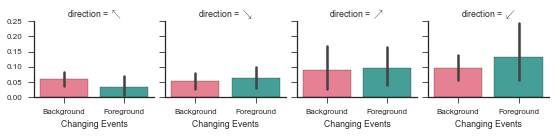

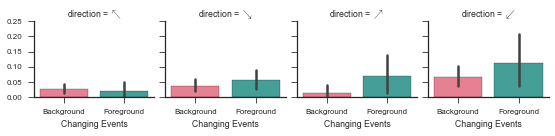

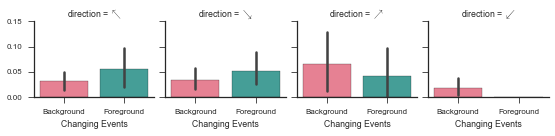

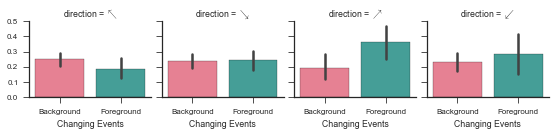

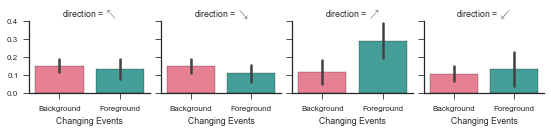

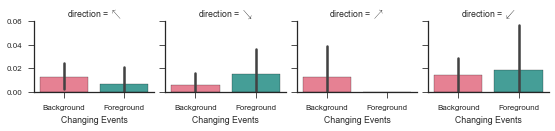

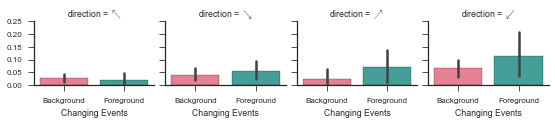

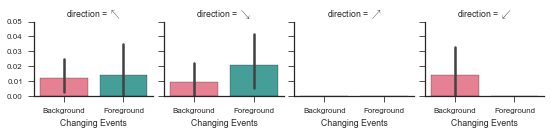

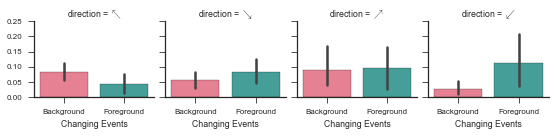

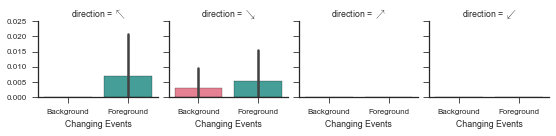

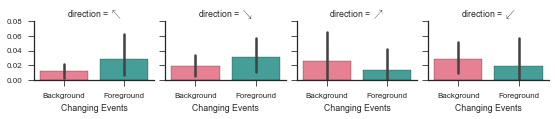

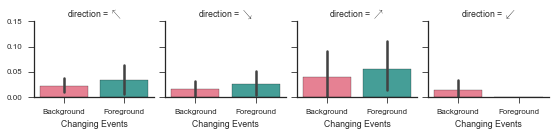

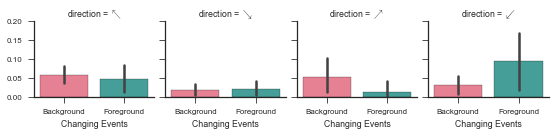

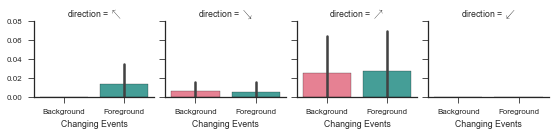

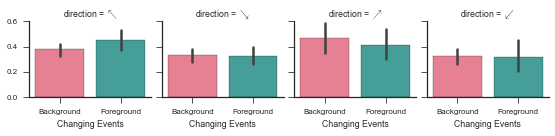

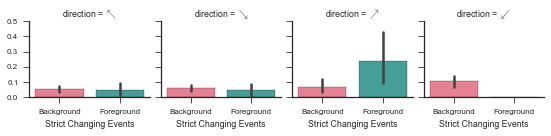

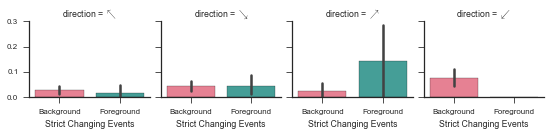

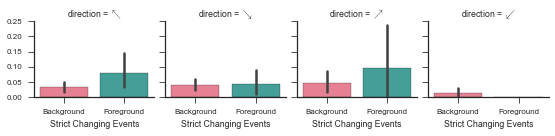

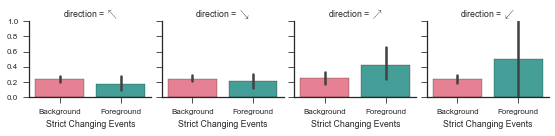

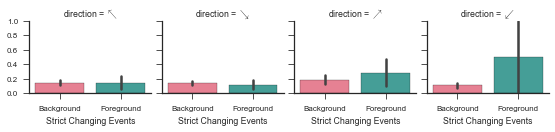

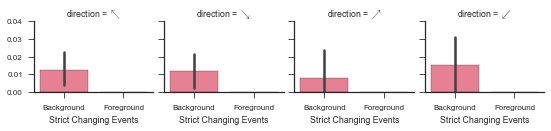

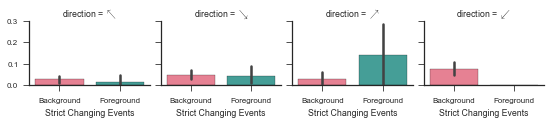

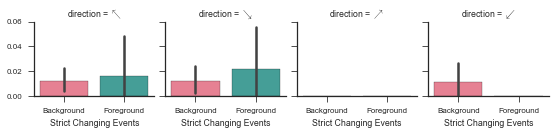

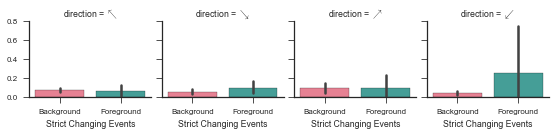

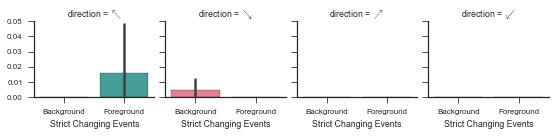

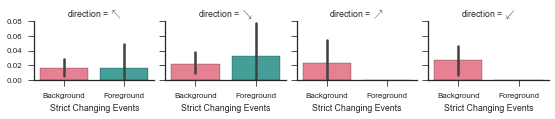

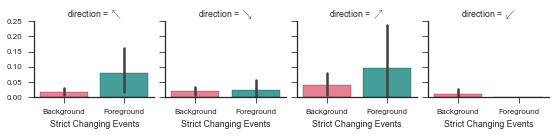

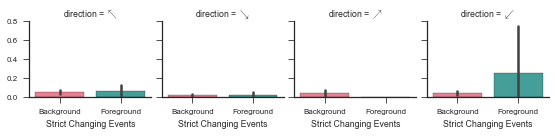

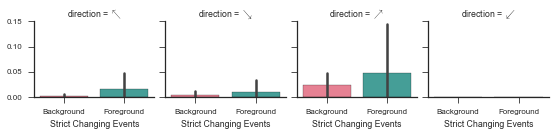

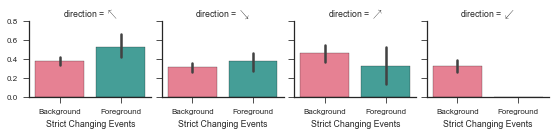

In [40]:
for X in changing_events_cols:
    boolean_feature_folder = '{}/boolean_features'.format(folderize(X))
    !mkdir $boolean_feature_folder

    boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
            'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
            'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
           'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
           'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

    for col in boolean_cols:
        g = sns.factorplot(y=col, x=X, #hue='Polarization', 
                           data=feature_data, col='direction',
                           aspect=1, kind='bar', size=2, palette='husl')
        for ax in g.axes.flat:
            ax.locator_params('y', nbins=5)
    #         ax.set(ylabel='')
    #     g.fig.tight_layout()
        g.set(ylabel='')
        g.savefig('{}/{}.pdf'.format(boolean_feature_folder, col))

    #     p_values = pd.DataFrame(index=hue_order, columns=study.phenotype_order)
    #     for modality in hue_order:
    #         for phenotype in study.phenotype_order:
    #             M = n_events[phenotype]
    #             N = n_events_in_modality[phenotype, modality]
    #             n = study.splicing.feature_data.loc[events[phenotype], col].sum()
    #             x = study.splicing.feature_data.loc[events_in_modality[phenotype, modality], col].sum()

    #             p_values.loc[modality, phenotype] = hypergeom.sf(x, M, n, N)
    #     p_values = p_values.astype(float)

    #     heatmap_ax = axes_iter.next()
    #     plt.sca(heatmap_ax)
    #     sns.heatmap(-np.log10(p_values), annot=True, mask=p_values > 0.05, 
    #                 cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
    #     locations, labels = plt.yticks()
    #     plt.setp(labels, rotation=0)
    #     heatmap_ax.set(title=col)
    # heatmap_fig.tight_layout()
    # heatmap_fig.savefig('{}/p_values.pdf'.format(booelan_feature_folder))

### Numeric data

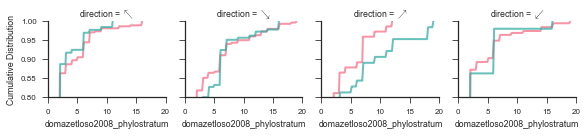

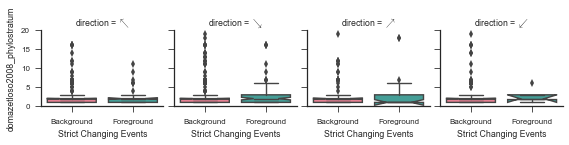

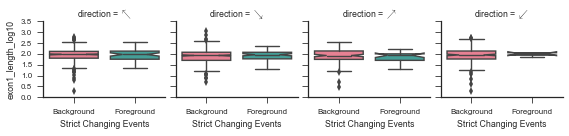

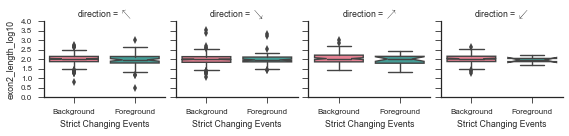

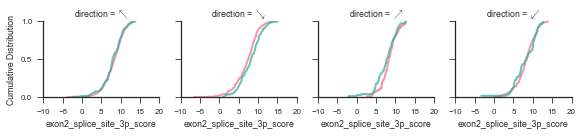

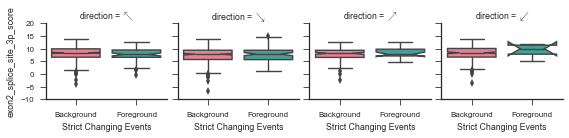

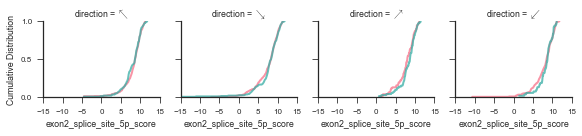

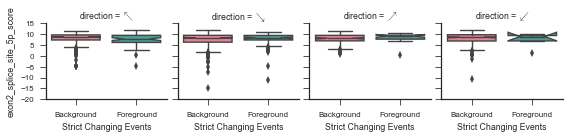

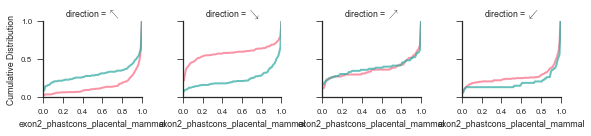

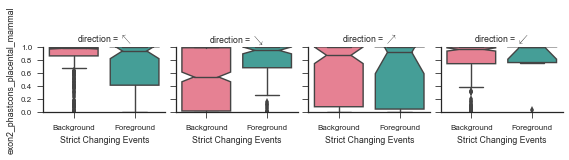

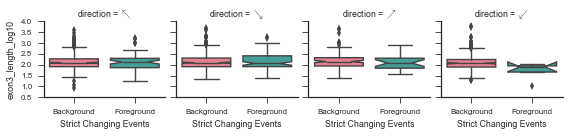

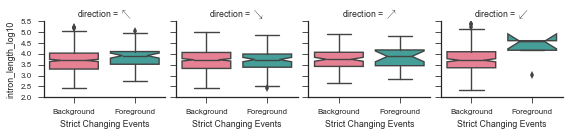

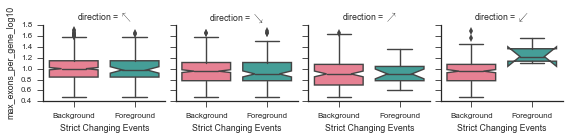

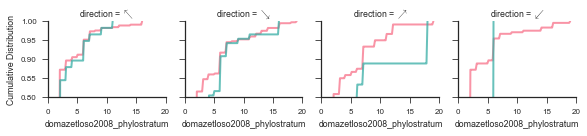

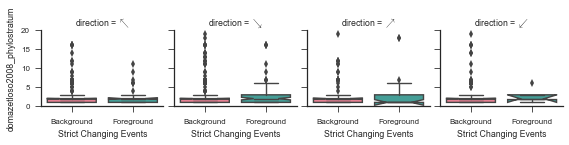

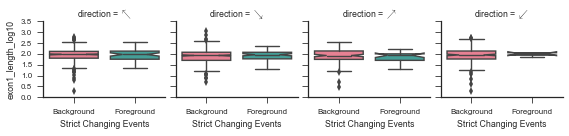

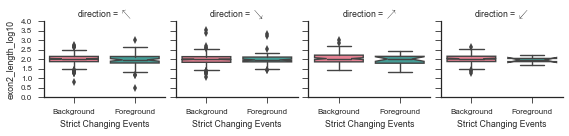

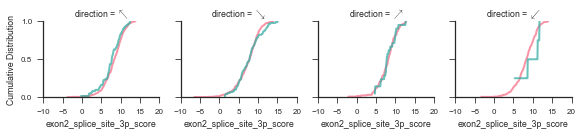

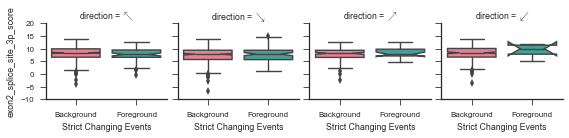

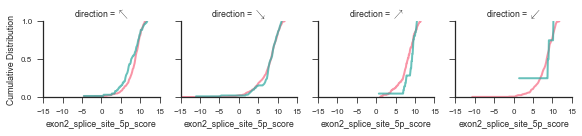

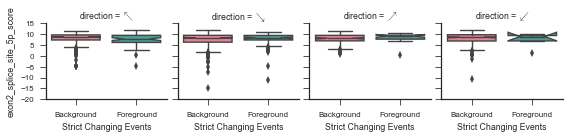

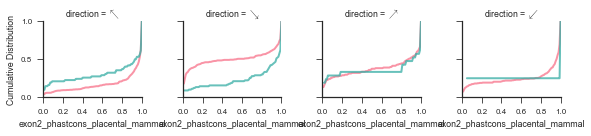

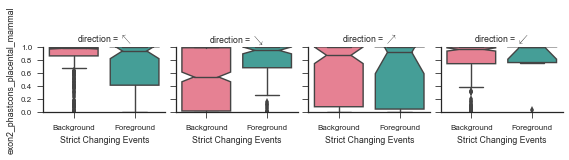

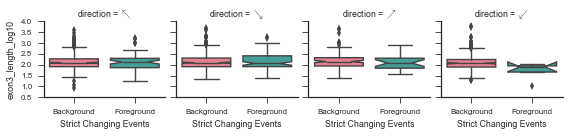

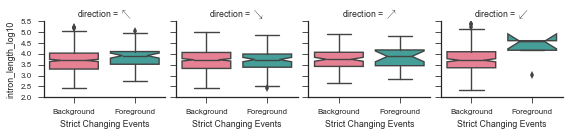

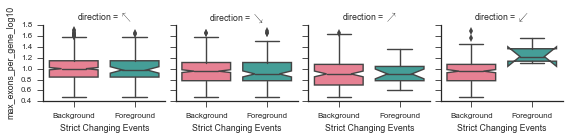

In [41]:


from flotilla.visualize.generic import cdfplot


numerical_cols = [#'log2(TPM+1)', 
#         'expression_var_log2_plus1', 
#         'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'max_exons_per_gene']


log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 
             'isoform1_gc_position2',
             'isoform1_gc_position3',
             'isoform2_gc',
             'isoform2_gc_position1',
             'isoform2_gc_position2',
             'isoform2_gc_position3',
            'exon2_splice_site_3p_score', 
            'exon2_splice_site_5p_score', 
            'exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]
nrows = len(numerical_cols)
# heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
# axes_iter = heatmap_axes.flat

for changing_events_col in changing_events_cols:
    numeric_features_folder = '{}/numeric_features'.format(folderize(changing_events_col))
    ! mkdir $numeric_features_folder

    for col in numerical_cols:
        for log10 in log10s:
            for plot in plots:
                suffix = '' if not log10 else '_log10'
                pdf = '{}/{}_{}{}.pdf'.format(numeric_features_folder, col, plot, suffix)
    #             if os.path.exists(pdf):
    #                 continue

                if log10 and col not in log10_cols:
                    continue
                if not log10 and col in log10_cols:
                    continue
                if plot == 'cdf':
                    if col not in cdf_cols:
                        continue
                    g = sns.FacetGrid(feature_data, hue=changing_events_col, size=2, col='direction',
                                      legend_out=True, palette='husl')
                    g.map(flotilla.visualize.generic.cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                    g.set(ylim=(0, 1))
                    if col == 'domazetloso2008_phylostratum':
                        g.set(ylim=(0.8, 1))
                    for ax in g.axes.flat:
                        if ax.is_first_col():
                            ax.locator_params('y', nbins=4)
                            ax.set_ylabel('Cumulative Distribution')
                else:
                    log_col = col + '_log10' if log10 else col
                    if log10:
                        feature_data[log_col] = np.log10(feature_data[col]).astype(float)

                    # Which column to plot
                    plot_col = log_col if log10 else col
                    g = sns.factorplot(y=log_col, x=X, data=feature_data,
                                       kind=plot, size=2, col='direction',
                                       notch=True, palette='husl')
                g.savefig(pdf)

### Isoform numeric features

In [45]:
isoform_cols = [x.replace('1_', '{}_') for x in feature_data.columns if x.startswith('isoform1')]
isoform_cols

['isoform{}_gc',
 'isoform{}_gc_position1',
 'isoform{}_gc_position2',
 'isoform{}_gc_position3',
 'isoform{}_translation',
 'isoform{}_gravy',
 'isoform{}_isoelectric_point',
 'isoform{}_instability_index',
 'isoform{}_molecular_weight',
 'isoform{}_protein_secondary_structure_helix',
 'isoform{}_protein_secondary_structure_sheet',
 'isoform{}_protein_secondary_structure_turn',
 'isoform{}_aromaticity',
 'isoform{}_iupred_score',
 'isoform{}_pfam_accession',
 'isoform{}_pfam_go_id',
 'isoform{}_pfam_go_name',
 'isoform{}_pfam_name']

In [71]:
X

'Changing Events'

In [72]:
feature_data.groupby([X, 'direction']).size()

Changing Events  direction 
Background       $\nearrow$    123
                 $\nwarrow$    360
                 $\searrow$    332
                 $\swarrow$    918
Tier 1           $\nearrow$     26
                 $\nwarrow$     60
                 $\searrow$     90
                 $\swarrow$      4
Tier 2           $\nearrow$     52
                 $\nwarrow$     73
                 $\searrow$    107
                 $\swarrow$    226
dtype: int64

In [46]:
feature_data_index = feature_data.set_index([X, 'direction'])

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/isoform_features': File exists


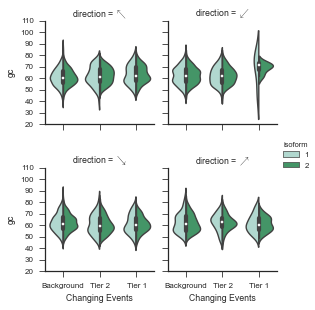

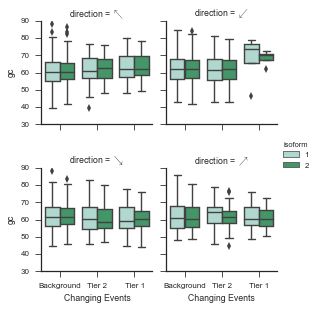

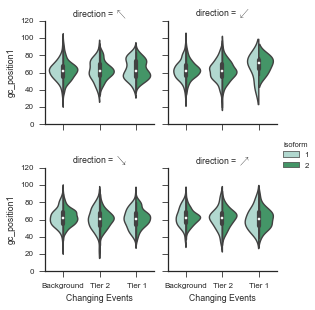

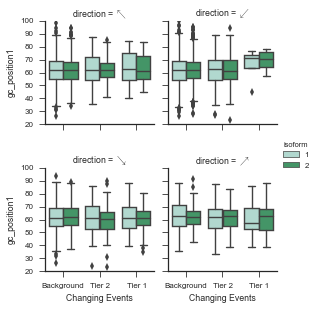

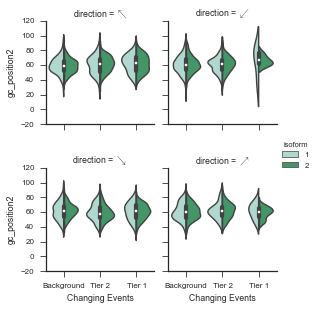

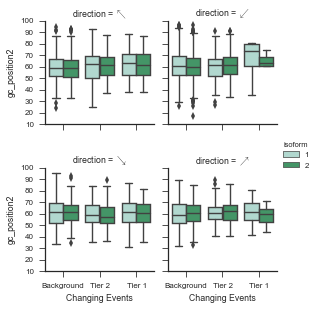

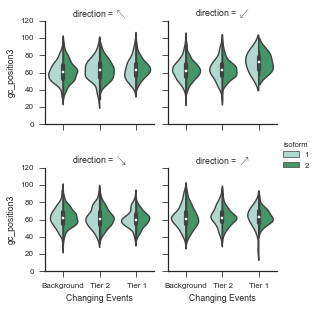

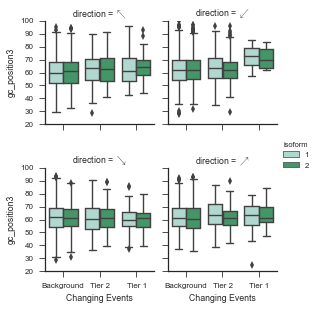

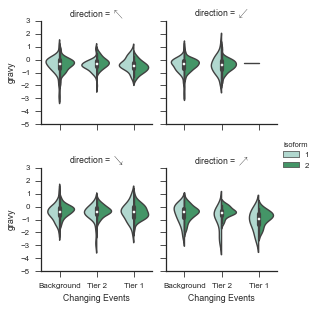

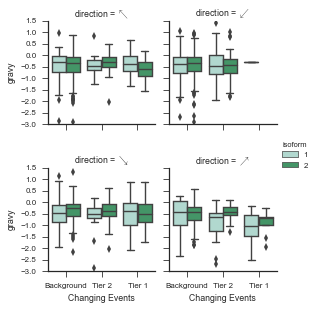

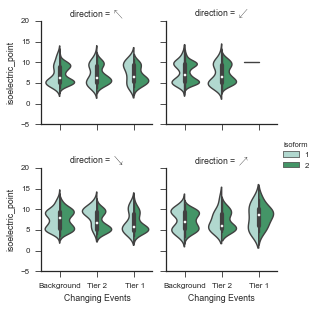

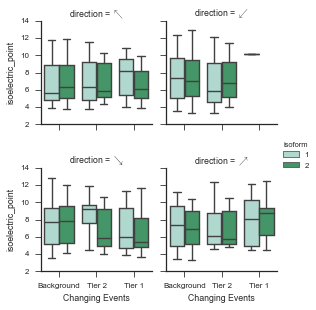

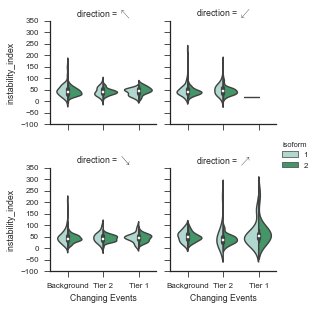

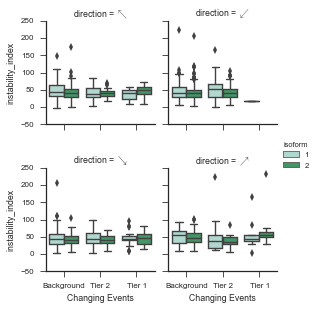

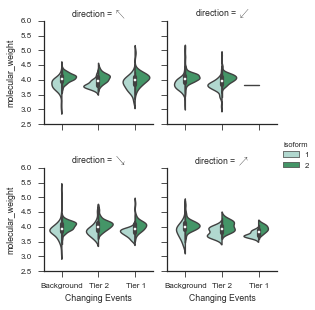

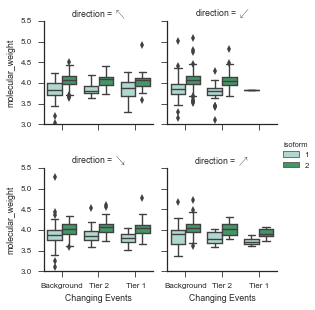

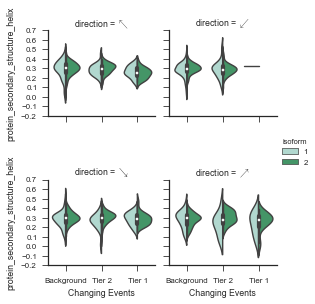

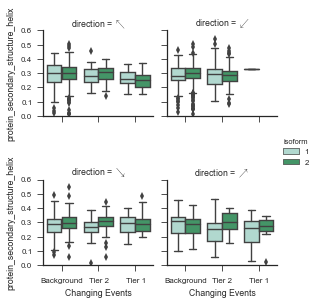

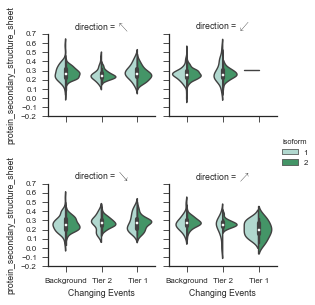

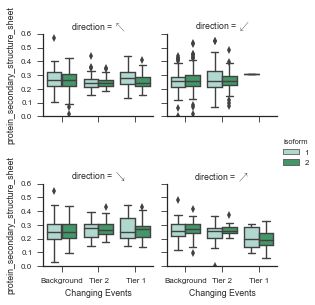

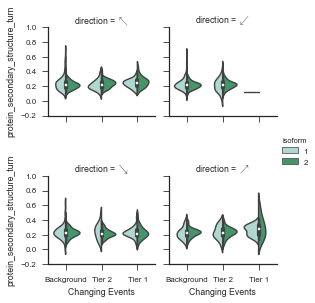

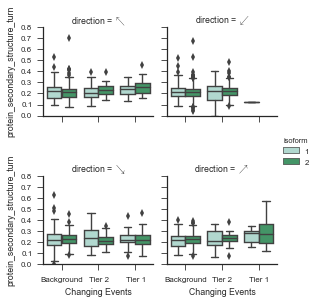

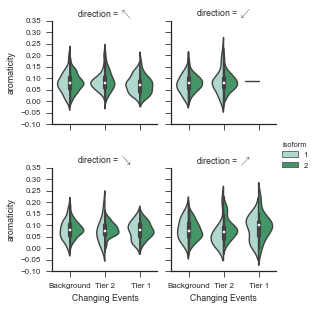

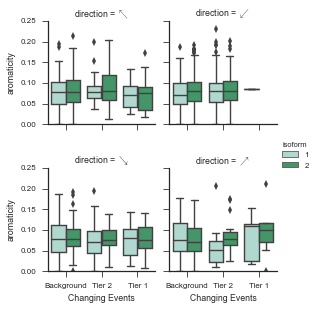

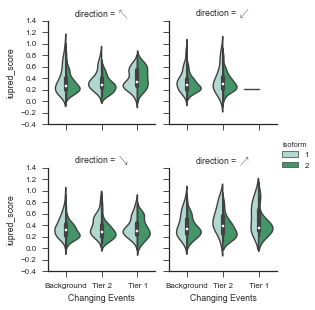

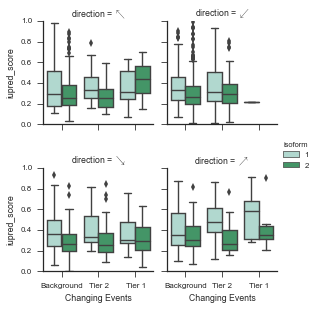

In [73]:
isoform_figure_folder = '{}/isoform_features'.format(folder)
! mkdir $isoform_figure_folder

non_numeric_cols = ['translation', 'pfam']

hue_order = '~0', 'bimodal', '~1'
palette = [MODALITY_TO_COLOR[m] for m in hue_order]


plot_kinds = 'violin', 'box'
for isoform_col in isoform_cols:
    if any(non_numeric in isoform_col for non_numeric in non_numeric_cols):
        continue
    
    x = isoform_col.format(1)
    y = isoform_col.format(2)
    
#     g = sns.FacetGrid(modalities_annotated, col='modality', row='phenotype', col_order=hue_order)
#     g.map(plt.hexbin, x, y, mincnt=1, gridsize=50, edgecolor=u'darkgrey')
#     g.set_titles("{col_name} {row_name}")
#     g.savefig('{}/modality_features_{}_hexbin.pdf'.format(folder, isoform_col.format('')))
    isoform1 = feature_data_index[x].reset_index()
    isoform2 = feature_data_index[y].reset_index()

    name = isoform_col.format('')
    isoform1 = isoform1.rename(columns={x:name})
    isoform2 = isoform2.rename(columns={y:name})

    isoform1['isoform'] = 1
    isoform2['isoform'] = 2
    df = pd.concat([isoform1, isoform2])

    if 'weight' in name:
        df[name] = np.log10(df[name])
        
    for kind in plot_kinds:
        if kind == 'violin':
            kwargs = dict(split=True)
        else:
            kwargs = dict(notch=False)
        g = sns.factorplot(hue='isoform', x=X, y=name, data=df, size=2, col='direction',
                           kind=kind, palette='BuGn',col_wrap=2, **kwargs)
        g.set_ylabels(name.replace('isoform_', ''))
        g.savefig('{}/{}_{}.pdf'.format(isoform_figure_folder, name, kind))

### Counting number of things (count-style figures)

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/count_style_figures': File exists


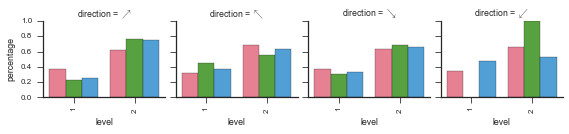

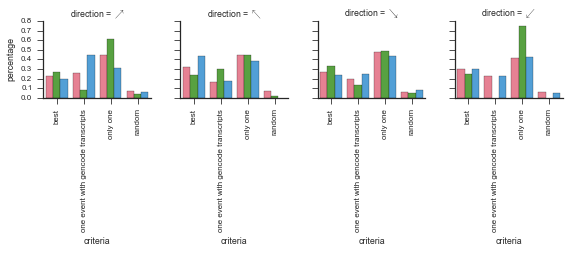

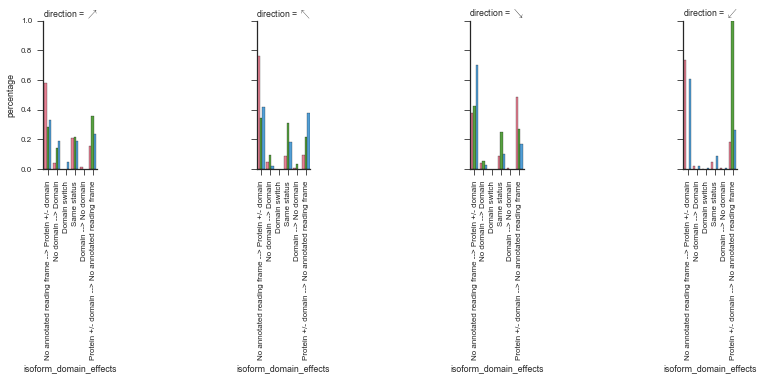

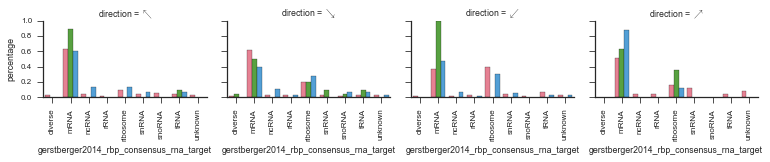

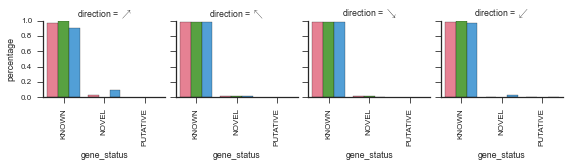

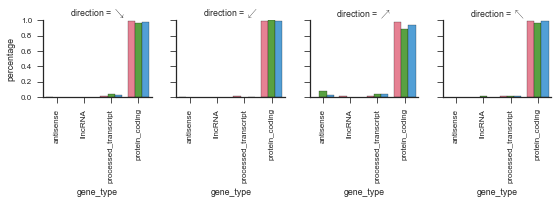

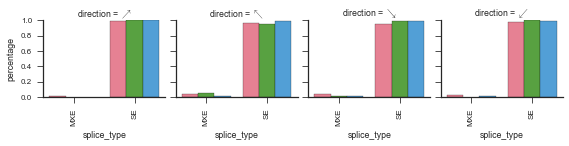

In [48]:
count_figure_folders = '{}/count_style_figures'.format(folder)
! mkdir $count_figure_folders

count_cols = ['level', 'criteria', u'isoform_domain_effects', 
              'gerstberger2014_rbp_consensus_rna_target', 'gene_status', 
              'gene_type', 'splice_type']

order = ['~0', 'bimodal', '~1']
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

for col in count_cols:
    s = feature_data.groupby([X, col, 'direction']).size()
    df = s.reset_index()
    df = df.rename(columns={0: 'count'})
    df['percentage'] = df.groupby([X, 'direction'])['count'].apply(lambda x: x/x.sum())
    if col == 'isoform_domain_effects':
        order = isoform_domain_effects_order
        palette = 'PRGn'
        size = 3
    else:
        order = None
        palette = 'husl'
        size = 2

#     print len(df[col].unique())
    g = sns.factorplot(hue=X, x=col, y='percentage', kind='bar',  data=df, col='direction',
                       size=size, order=order, palette='husl', legend=False,
                       aspect=max(1, len(df[col].unique())*0.15))
    for ax in g.axes.flat:
        xticklabels = map(lambda x: x.get_text(), ax.get_xticklabels())
        ax.set_xticklabels(xticklabels, rotation=90)
#     fig.tight_layout()
    g.savefig('{}/{}_barplot.pdf'.format(count_figure_folders, col))

## Kmers enriched in different tiers

In [49]:
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier1), 'Tier'] = "Tier 1"
study.supplemental.voyages.loc[study.supplemental.voyages['event_id'].isin(tier2), 'Tier'] = "Tier 2"
study.supplemental.voyages.groupby('Tier').size()

Tier
Tier 1     504
Tier 2    1432
dtype: int64

In [50]:
study.supplemental.voyages.groupby(['Tier', 'direction']).size()

Tier    direction 
Tier 1  $\nearrow$     86
        $\nwarrow$    142
        $\searrow$    237
        $\swarrow$     39
Tier 2  $\nearrow$    161
        $\nwarrow$    278
        $\searrow$    345
        $\swarrow$    648
dtype: int64

In [51]:
from astrolabe.utils import remove_latex_chars_from_arrow

In [52]:
bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_changing_events'
! mkdir $bed_folder

mkdir: cannot create directory `/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_changing_events': File exists


In [53]:
background_events = background.copy()

In [54]:
exon2s = map(lambda x: x.split('@')[1], background_events)
exon2s

['exon:chr2:71588775-71588825:+',
 'exon:chr19:35752828-35752884:+',
 'exon:chr7:103006523-103006610:+',
 'exon:chr16:4393484-4393595:-',
 'exon:chr1:147408741-147408800:+',
 'exon:chr4:48839177-48839269:+',
 'exon:chr8:82597998-82598198:-',
 'exon:chr19:49949808-49949951:-',
 'exon:chr1:113464612-113464755:-',
 'exon:chr2:148676016-148676161:+',
 'exon:chr17:60685402-60685509:+',
 'exon:chr1:43130534-43130626:+',
 'exon:chr2:160585520-160585686:+',
 'exon:chr8:61484605-61484672:+',
 'exon:chr20:42242490-42242616:+',
 'exon:chr14:68156929-68157138:-',
 'exon:chr15:40241317-40241469:+',
 'exon:chr17:5014371-5014514:-',
 'exon:chr17:35980918-35980993:-',
 'exon:chr19:2234149-2234239:-',
 'exon:chr12:49580773-49580867:-',
 'exon:chr8:80915234-80915415:-',
 'exon:chr17:27041811-27041918:-',
 'exon:chrX:23886710-23886805:-',
 'exon:chr12:76467983-76468019:-',
 'exon:chr7:100865885-100866055:+',
 'exon:chr15:44062721-44062778:+',
 'exon:chr14:23609680-23609833:-',
 'exon:chr5:86700661-867008

In [55]:
from outrigger.region import Region

In [56]:
exon2_regions = map(Region, exon2s)

In [57]:
exon2_bed_table = pd.DataFrame(map(lambda x: [x.chrom, x._start, x._stop, x.name, 1000, x.strand], exon2_regions))
exon2_bed_table[3] = background_events
exon2_bed_table.head()

,0,1,2,3,4,5
0,chr2,71588775,71588825,exon:chr2:71582849-71582910:+@exon:chr2:715887...,1000,+
1,chr19,35752828,35752884,exon:chr19:35749848-35749967:+@exon:chr19:3575...,1000,+
2,chr7,103006523,103006610,exon:chr7:103004590-103004754:+@exon:chr7:1030...,1000,+
3,chr16,4393484,4393595,exon:chr16:4401233-4401263:-@exon:chr16:439348...,1000,-
4,chr1,147408741,147408800,exon:chr1:147400549-147400691:+@exon:chr1:1474...,1000,+


In [58]:
exon2_bed_table = exon2_bed_table.sort_values(by=3)
exon2_bed_table.head()

,0,1,2,3,4,5
2427,chr10,101163481,101163631,exon:chr10:101165513-101165617:-@exon:chr10:10...,1000,-
7578,chr10,101478103,101478257,exon:chr10:101480744-101480825:-@exon:chr10:10...,1000,-
6848,chr10,101510126,101510153,exon:chr10:101507014-101507147:+@exon:chr10:10...,1000,+
6425,chr10,101996607,101996726,exon:chr10:101997779-101997988:-@exon:chr10:10...,1000,-
2430,chr10,101997779,101997988,exon:chr10:102003455-102003529:-@exon:chr10:10...,1000,-


In [59]:
exon2_bed_table.to_csv('{}/background_events.bed'.format(folder), index=False, header=False, sep='\t')

In [60]:
! head -n 20 $folder/background_events.bed

chr10	101163481	101163631	exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-	1000	-
chr10	101478103	101478257	exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-	1000	-
chr10	101510126	101510153	exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+	1000	+
chr10	101996607	101996726	exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-	1000	-
chr10	101997779	101997988	exon:chr10:102003455-102003529:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-	1000	-
chr10	102010005	102010089	exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-	1000	-
chr10	102016019	102016233	exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-	1000	-
chr10	102019975	102020076	exon:chr10:102020723-102020785:-@exon:chr10:102019

In [61]:
! grep 'exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+' $folder/background_events.bed

chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+	1000	+
chr10	103364897	103364969	exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+	1000	+


In [62]:
import pybedtools

In [63]:
len(event_names & background_events)

NameError: name 'event_names' is not defined

In [ ]:
exon2_bed_table[3].isin(event_names).sum()

In [ ]:
exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)
exon_bed.filter(lambda x: x.name in event_names)

In [ ]:
len(exon_bed)

In [ ]:
# for x in exon_bed:
#     if x.name in event_names:
#         print x.name

In [ ]:
x.name

In [ ]:
'exon:chr11:134120169-134120232:-@exon:chr11:134119722-134119814:-@exon:chr11:134118776-134119156:-' in background_events

### Redo this once you have the (-) strand exon data

In [ ]:
import pyhomer
DIRECTIONS = 'upstream', 'downstream'

import pybedtools

DIR = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

exon_bedfile = '{}/background_events.bed'.format(folder)
exon_bed = pybedtools.BedTool(exon_bedfile)

commands = []

findMotifsGenome = '/home/yeo-lab/software/homer/bin/findMotifsGenome.pl'
n_processors = 4
homer_flags = '-rna -len 4,5,6 -mset vertebrates -mis 0 -p {} -noweight'.format(n_processors)


primate_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPrimates.bed'
primate = pybedtools.BedTool(primate_filename)
placental_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPlacental.bed'
placental = pybedtools.BedTool(placental_filename)
conserved_regions = {'primate': primate, 'placental': placental}

conservation_bed = placental

genome = 'hg19'

nt = 400

from Bio import SeqIO
import kvector

genome_fasta = '/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa'

def get_kmer_matrix(filename, kmer_lengths=(4, 5, 6)):
    kmers = kvector.kmer.make_kmers(kmer_lengths)
    
    with open(seqs.seqfn) as f:
        records = list(SeqIO.parse(f, 'fasta'))
#         records = [x.reverse_complement() if x.id[-1]]
    kmer_matrix = pd.DataFrame(0, columns=kmers, dtype=int, index=range(len(records)))

    for col, record in enumerate(records):
        for k in kmer_lengths:
            for i in range(len(record) - k + 1):
                kmer = str(record[i:(i+k)].seq).upper()
                kmer_matrix.loc[col, kmer] += 1
    return kmer_matrix


kmer_zscores = []

event_tiers = {'tier1': tier1, 'tier2': tier2}

for (tier, arrow), df in study.supplemental.voyages.groupby(['Tier', 'direction']):
    print '---\n', tier, arrow
    event_names = set(df.event_id)
    
    format_args = bed_folder, tier, remove_latex_chars_from_arrow(arrow)
    foreground_table = exon2_bed_table.loc[exon2_bed_table[3].isin(event_names)]
    foreground_filename = '{}/exon2_{}_{}_foreground.bed'.format(*format_args)
    foreground_table.to_csv(foreground_filename, index=False, header=False, sep='\t')
    foreground = pybedtools.BedTool(foreground_filename)

    background_bed = exon_bed
    background_filename = '{}/exon2_{}_{}_background.bed'.format(*format_args)
    background = pybedtools.BedTool(background_bed.saveas(background_filename))

    pair = pyhomer.ForegroundBackgroundPair(foreground, background)
#         print '\n', pair 

    for direction in DIRECTIONS:
        print '\n\t', direction
        intron_pair = pair.flanking_intron(direction, 'hg19', 400)

        conserved_introns = intron_pair.intersect(conservation_bed, 'placental')
#             print '\n', conserved_introns
#         %time 
        seqs = conserved_introns.foreground.sequence(fi=genome_fasta, s=True)
#         import pdb; pdb.set_trace()
        
        %time foreground_kmers = get_kmer_matrix(seqs.seqfn)

        %time seqs = conserved_introns.background.sequence(fi=genome_fasta, s=True)
        %time background_kmers = get_kmer_matrix(seqs.seqfn)
        kmer_zscore = (foreground_kmers.mean() - background_kmers.mean())/background_kmers.std()
        kmer_zscore.name = '{}{}nt_{}_{}_placental'.format(direction, nt, tier, remove_latex_chars_from_arrow(arrow))
        kmer_zscores.append(kmer_zscore)
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
kmer_zscores_all.head()

In [ ]:
kmer_zscores_all = pd.concat(kmer_zscores, axis=1)
print kmer_zscores_all.shape
kmer_zscores_all = kmer_zscores_all.dropna(how='all', axis=1)
kmer_zscores_all = kmer_zscores_all.fillna(0)
print kmer_zscores_all.shape
kmer_zscores_all.head()

In [ ]:
study.supplemental.tier12_kmer_zscores = kmer_zscores_all

In [ ]:
study.save('singlecell_pnm_figure4_voyages_kmers', flotilla_dir=flotilla_dir)

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(kmer_zscores_all, linewidth=1)
ax.set_xticklabels(kmer_zscores_all.columns, rotation=90);
xmin, xmax = ax.get_xlim()
ax.hlines(0, xmin, xmax, linestyle=':', color='k')
sns.despine()
fig.tight_layout()

In [ ]:
import matplotlib as mpl
from anchor import MODALITY_TO_COLOR

# dark2 = sns.color_palette('Dark2', n_colors=10)
# sns.palplot(dark2)
# accent = sns.color_palette('Accent', n_colors=10)
# sns.palplot(accent)
sns.palplot(MODALITY_PALETTE)

sns.palplot(sns.color_palette('PRGn', n_colors=2))
region_to_color = dict(zip(['upstream', 'downstream'], 
                            map(mpl.colors.rgb2hex, sns.color_palette('PRGn', n_colors=2))))
direction_to_color = {r'nwarrow': MODALITY_TO_COLOR['~1'], r'searrow': MODALITY_TO_COLOR['~0'],
                      r'swarrow': MODALITY_TO_COLOR['middle'], r'nearrow': MODALITY_TO_COLOR['bimodal']}
sequential = map(mpl.colors.rgb2hex, sns.color_palette('Blues_r', n_colors=2))
sns.palplot(sequential)

tier_to_color = dict(zip(['Tier 1', 'Tier 2'], sequential))

In [ ]:
from anchor import MODALITY_TO_COLOR
sns.set(style='whitegrid')

columns = kmer_zscores_all.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

sns.clustermap(kmer_zscores_all.corr(), figsize=(4, 4), col_colors=intron_colors, row_colors=intron_colors)

In [ ]:
sns.clustermap(kmer_zscores_all, col_colors=intron_colors, metric='sqeuclidean')

### Match kmers to known motifs

In [ ]:
kmer_folder = '{}/kmers'.format(figure_folder)
! mkdir $kmer_folder

In [ ]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [ ]:
sns.set(style='ticks')
s = cisbp_motifs.map(len)
s.name = 'Motif length'
s = s.reset_index()
# s =
order = sorted(s['Motif length'].unique())
g = sns.factorplot(data=s, kind='count', x="Motif length", order=order, size=2, aspect=1.25)
g.savefig('{}/cisbp_motif_sizes.pdf'.format(figure_folder))

In [ ]:
cisbp_motifs_inf = cisbp_motifs.map(lambda x: x[x > 0.01])
cisbp_motifs_inf = cisbp_motifs_inf.map(lambda x: x.fillna(-np.inf))

In [ ]:
kmer_lengths = 4, 5, 6
kmers = kvector.io.make_kmers(kmer_lengths, 'ACGT')
kmers_list = map(list, kmers)

In [ ]:

def kmers_in_motif(pwm, kmers, vmin=0.01, threshold=0.5):
    """Generator to check if a kmer is exactly contained in a PWM

    This does not score kmers and PWMs, only checks if a kmer can 
    be exactly contained in a PWM with no mismatches, above a certain 
    threshold. Since most PWMs come with psuedocounts, the value 
    `vmin` is taken as the floor, and everything underneath will be 
    convered to -inf, so any 

    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    vmin : float
        Minimum value for a residue to have a valid value in a PWM

    """
    pwm[pwm <= vmin] = -np.inf
    
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)

        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer)) > 0
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(motif_length), kmer[start:(start+motif_length)]))/divisor > threshold for start in starts)
        else:
            # all that's left is: k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = any(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor > threshold for start in starts)
        yield score

from kvector.kmer import make_kmers

def motifs_to_kmer_bool(motifs, residues, kmer_lengths):
    kmers = make_kmers(kmer_lengths, residues)
    kmers_list = map(list, kmers)

    motif_scores = motifs.map(
        lambda x: pd.Series(kmers_in_motif(x, kmers_list), index=kmers))
    motif_scores = pd.DataFrame.from_records(motif_scores).T
    motif_scores.columns = motifs.index
    return motif_scores

In [ ]:
%time cisbp_kmers = motifs_to_kmer_bool(cisbp_motifs, 'ACGT', kmer_lengths)
cisbp_kmers.head()

In [ ]:
cisbp_kmers.columns = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_kmers.head()

In [ ]:
cisbp_kmers.to_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder))

In [ ]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=4)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax))
sns.despine()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [ ]:

kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

In [ ]:
kmer_means = study.supplemental.tier12_kmer_zscores.mean()

In [ ]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()
cisbp_metadata.head()

### t-test of CISBP kmer enrichment over 0

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
sns.clustermap(t_statistic_homo_sapiens)

### Try same thing but with t-test vs kmer mean instead of 0

In [ ]:
cisbp_kmers.head()

In [ ]:
cisbp_metadata.head()

In [ ]:
cisbp_kmers_homo_sapiens = cisbp_kmers.loc[:, cisbp_metadata['Full Species'] == 'Homo sapiens']
cisbp_kmers_homo_sapiens.head()

In [ ]:
from scipy.stats import ttest_1samp

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for intron_name, intron_col in study.supplemental.tier12_kmer_zscores.iteritems():
    for cisbp_name, cisbp_kmer in cisbp_kmers_homo_sapiens.iteritems():
        statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
#         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], 0)
        lines.append([intron_name, cisbp_name, statistic, p_value])
kmer_cisbp_ttest_tidy = pd.DataFrame(lines, columns=['Intron', 'RBP Motif', 'T-Statistic', '$p$-value'])
# kmer_cisbp_ttest_tidy['RBP Motif'] = kmer_cisbp_ttest_tidy['RBP Motif long'].str.split().str.get(0)
t_statistic = kmer_cisbp_ttest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
# t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape


In [ ]:
t_statistic_homo_sapiens

In [ ]:
columns = t_statistic_homo_sapiens.columns

# phenotype_colors = columns.map(lambda x: phenotype_to_color[x.split('_')[1]])
tier_colors = columns.map(lambda x: tier_to_color[x.split('_')[1]])
direction_colors = columns.map(lambda x: direction_to_color[x.split('_')[2]])
region_colors = columns.map(lambda x: region_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')])
intron_colors = [tier_colors, direction_colors, region_colors]

g = sns.clustermap(t_statistic_homo_sapiens.corr(), col_colors=intron_colors, row_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_pearson_correlation_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors)
g.savefig('{}/cisbp_t_statistic_clustermap.pdf'.format(kmer_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors, figsize=(4, 40))
g.savefig('{}/cisbp_t_statistic_clustermap_tall.pdf'.format(kmer_folder))

In [ ]:
# sns.pairplot(t_statistic_homo_sapiens)

In [ ]:
kmer_cisbp_ttest_tidy_metadata = pd.concat([kmer_cisbp_ttest_tidy, kmer_cisbp_ttest_tidy['Intron'].str.split('_').apply(pd.Series)],
                                          axis=1)
kmer_cisbp_ttest_tidy_metadata = kmer_cisbp_ttest_tidy_metadata.rename(columns={0:'region', 1:'Tier', 2:'direction', 3:'clade'})
kmer_cisbp_ttest_tidy_metadata.head()

In [ ]:
kmer_cisbp_ttest_tidy_metadata['$q$-value'] = kmer_cisbp_ttest_tidy_metadata.groupby('Intron', as_index=False, group_keys=False)\
    .apply(lambda x: x['$p$-value'] * x.shape[0])

In [ ]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.distplot(kmer_cisbp_ttest_tidy_metadata['$q$-value'])

In [ ]:
kmer_cisbp_ttest_tidy_significant = kmer_cisbp_ttest_tidy_metadata.loc[kmer_cisbp_ttest_tidy_metadata['$q$-value'] < 1e-3]
kmer_cisbp_ttest_tidy_significant

In [ ]:
tier1_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 1 and x['Tier'] == 'Tier 1')

In [ ]:
both_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(lambda x: len(x) == 2)
both_significant_2d = both_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
both_significant_2d = both_significant_2d.fillna(0)
both_significant_2d.shape

In [ ]:
sns.clustermap(both_significant_2d)

In [ ]:
tier1_significant_2d = tier1_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier1_significant_2d.isnull()

# Get the actual values for clustering
tier1_significant_2d = t_statistic_homo_sapiens.loc[tier1_significant_2d.index, :]
print tier1_significant_2d.shape
tier1_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, #mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap.pdf'.format(kmer_folder))

In [ ]:
sns.set(style='darkgrid')
g = sns.clustermap(tier1_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 30))
g.savefig('{}/cisbp_t_statistic_tier1_significant_clustermap_masked.pdf'.format(kmer_folder))

In [ ]:
tier2_significant = kmer_cisbp_ttest_tidy_significant.groupby(['direction', 'region', 'RBP Motif']).filter(
    lambda x: len(x) == 1 and x['Tier'] == 'Tier 2')
tier2_significant_2d = tier2_significant.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
mask = tier2_significant_2d.isnull()

# Get the actual values for clustering
tier2_significant_2d = t_statistic_homo_sapiens.loc[tier2_significant_2d.index, :]
print tier2_significant_2d.shape
tier2_significant_2d.head()

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))

In [ ]:
sns.set(style='darkgrid')
sns.clustermap(tier2_significant_2d, mask=mask, 
               col_colors=intron_colors, figsize=(4, 20))